In [207]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

import matplotlib.pyplot as plt
import numpy as np


TensorFlow version: 2.15.0


In [439]:
# Load the MNIST data.
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

fraction = 1.0

train_random_index = np.random.randint(0, len(x_train), int(len(x_train)*min(1.0, fraction)))
x_train = x_train[train_random_index]
y_train = y_train[train_random_index]

test_random_index = np.random.randint(0, len(x_test), int(len(x_test)*min(1.0, fraction)))
x_test = x_test[test_random_index]
y_test = y_test[test_random_index]


# Check the shape of the input data
print(f"x_train.shape = {x_train.shape}. {type(x_train)}")  
print(f"y_train.shape = {y_train.shape}")  
print(f"x_test.shape  = {x_test.shape}")  
print(f"y_test.shape  = {y_test.shape}")  


x_train.shape = (60000, 28, 28). <class 'numpy.ndarray'>
y_train.shape = (60000,)
x_test.shape  = (10000, 28, 28)
y_test.shape  = (10000,)


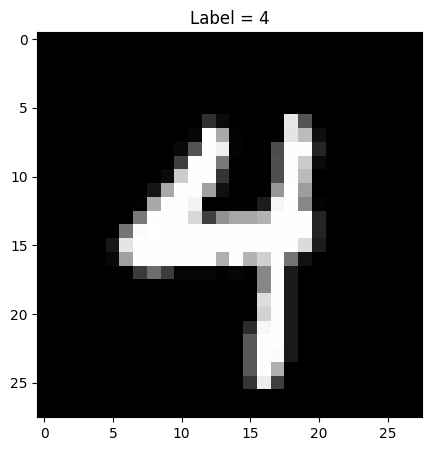

In [440]:
# Plot one example
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
rand_index = np.random.randint(0,len(x_train))
ax.imshow(x_train[rand_index], cmap="binary_r")
ax.set_title(f"Label = {y_train[rand_index]}")
plt.show()

In [446]:
# Define a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flattened 1D input layer
    tf.keras.layers.Dense(128, activation='relu'),  # 128-node hidden layer
    tf.keras.layers.Dropout(0.2),                   # 20% Dropout
    tf.keras.layers.Dense(10)                       # 10-node output (one per digit)
])

In [447]:
# Test the model without any training using one of the example images.
print(x_train[:1].shape)
predictions = model(x_train[:1]).numpy()

# Convert the "logit" output from the model into probabilities for each output using a softmax function
tf.nn.softmax(predictions).numpy()

# Note that all outputs are roughly equal; the model hasn't been trained so it's essentially guessing.

(1, 28, 28)


array([[0.1582831 , 0.10402112, 0.06348764, 0.06738758, 0.15826197,
        0.12547599, 0.07194327, 0.08301517, 0.0810257 , 0.0870985 ]],
      dtype=float32)

Epoch 1/20
938/938 [==============================] - 1s 965us/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0789 - val_accuracy: 0.9827
Epoch 2/20
938/938 [==============================] - 1s 874us/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0813 - val_accuracy: 0.9825
Epoch 3/20
938/938 [==============================] - 1s 874us/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0834 - val_accuracy: 0.9829
Epoch 4/20
938/938 [==============================] - 1s 893us/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0789 - val_accuracy: 0.9826
Epoch 5/20
938/938 [==============================] - 1s 870us/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0802 - val_accuracy: 0.9828
Epoch 6/20
938/938 [==============================] - 1s 878us/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0837 - val_accuracy: 0.9831
Epoch 7/20
938/938 [==============================] - 1s 869us/step - loss: 0.0155 - accuracy: 0.9945 - val_loss: 0.0900 - val_accuracy:

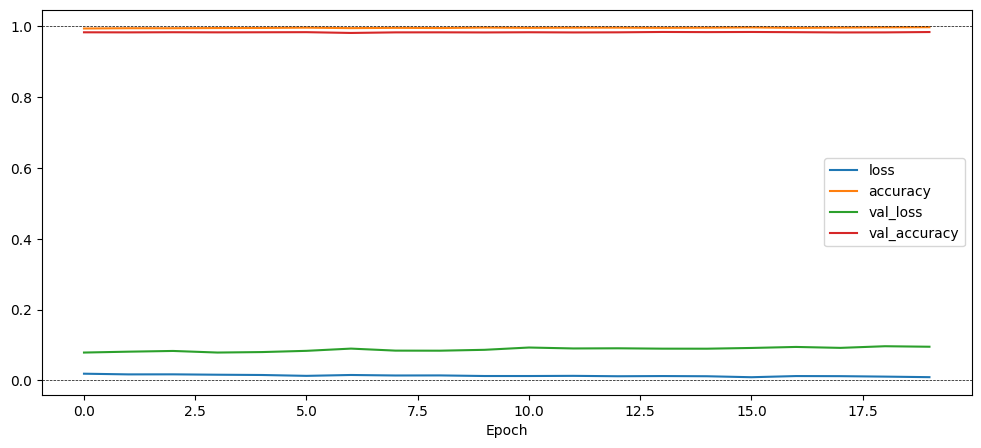

In [474]:
# Define a loss function to use when training the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

# Train the model, saving the evolution of the metrics and loss to a variable
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.5, use_multiprocessing=False)



# Plot the evolution of the model with epoch
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

labels = [k for k in history.history]
for label in labels:
    ax.plot(np.arange(0,len(history.history[label])), history.history[label], label=label)
ax.set_xlabel("Epoch")
ax.axhline(0.0, linewidth=0.5, linestyle='--', color='black')
ax.axhline(1.0, linewidth=0.5, linestyle='--', color='black')
ax.legend()

# Check the model's performance against the test set
print("\n\nEvaluation against the test set:")
a = model.evaluate(x_test, y_test, verbose=2)


(1, 28, 28)
 1   0.0%
 2   0.0%
 3   0.0%
 4   0.0%
 5   0.0%
 6   0.0%
 7   0.0%
 8 100.0%
 9   0.0%
10   0.0%


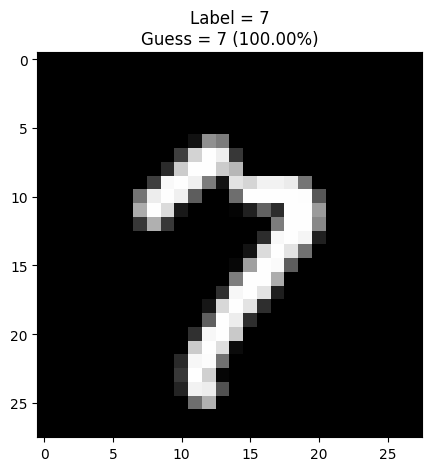

In [473]:
# Plot a random example prediction.

rand_index = np.random.randint(0,len(y_test))
print(x_test[rand_index].reshape(-1, *x_test[rand_index].shape).shape)
predictions = model(x_test[rand_index].reshape(1,28,28)).numpy()
p = tf.nn.softmax(predictions).numpy()
# print(p)

for k in range(10):
    print(f"{k+1:>2d} {p[0][k]*100:>5.1f}%")
    
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(x_test[rand_index], cmap="binary_r")
ax.set_title(f"Label = {y_test[rand_index]}\nGuess = {np.argmax(p)} ({np.max(p)*100:5.2f}%)")
plt.show()
